<a href="https://colab.research.google.com/github/Samay-Kochhar/Ipl-2022-Dataanalysis/blob/main/IPL_2022_simplilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Include all the libraries

import pandas as pd #Datamanipulation
import numpy as np
# Data visualisation
import seaborn as sns    
import matplotlib.pyplot as plt

# plot graphics will appear inside the notebook
%matplotlib inline

# thisis to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ipl is the name of the dataframe and we are adding the dataset using readcsv
ipl = pd.read_csv('/content/ipl_2022_dataset.csv')

In [3]:
# it shows the top of table
ipl.head()


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
# shape gives rows and columns in the dataframe
# 74 rows and 20 columns
ipl.shape

(633, 8)

In [5]:
# provides info about the dataset 
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [6]:
# columns give different columns present
ipl.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [7]:
# drop is used to drop the column 
# dataframe.drop('column name', axis=1 , inplace = True(replace and remov epermanently ))
ipl.drop('Unnamed: 0', axis=1 , inplace = True)

In [8]:
# this is the best 
ipl.isnull().sum()


Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [9]:
# to see null values in a particular column
# dataframe[dataframe['column name'].isnull()]. 
ipl[ipl['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [10]:
# to fill null values with 0
# dataframe['column name']=dataframe['column name'].fillna(0)
ipl['COST IN ₹ (CR.)']= ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['Cost IN $ (000)']= ipl['Cost IN $ (000)'].fillna(0)

In [11]:
# we can replace the null value with a text value
# dataframe['column name']=dataframe['column name'].fillna('Not participated')
ipl['2021 Squad']=ipl['2021 Squad'].fillna('Not participated')

In [12]:
ipl.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [13]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [14]:
ipl['status'] = ipl['Team'].replace(teams,'Sold')

In [15]:
# sometimes player have same name so to keep them
ipl[ipl['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


In [16]:
# to find total number of 
# how many players participated in the auction
ipl.shape[0]

633

In [17]:
# to find diffrent types of players 
types=ipl['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

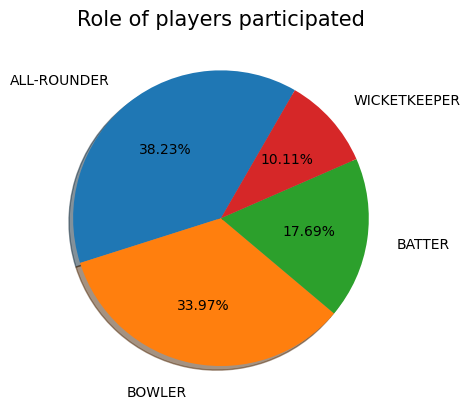

In [18]:
# to plot pie chart of different types of players
plt.pie(types.values, labels=types.index, labeldistance=1.2 , autopct='%1.2f%%', shadow=True, startangle=60)
plt.title('Role of players participated', fontsize=15)
plt.plot()

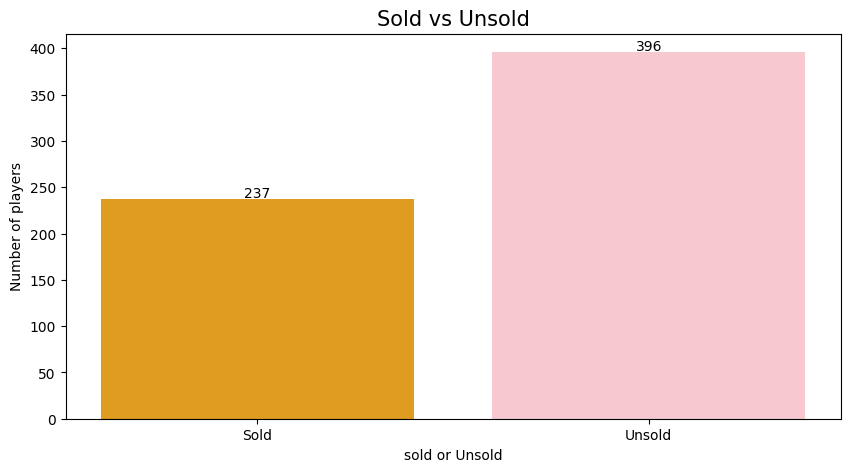

In [20]:
# bar graph for sold and unsold players
# there is some error
plt.figure(figsize=(10,5))
fig = sns.countplot(x=ipl['status'], palette=['Orange','Pink'])
plt.xlabel('sold or Unsold')
plt.ylabel('Number of players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

for p in fig.patches:
  fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
  p.get_width()/2., p.get_height()), ha='center', va='center',
  xytext=(0,4), textcoords='offset points')

In [21]:
# if we just want to know the number of the sold and unsold players
ipl.groupby('status')['Player'].count()

status
Sold      237
Unsold    396
Name: Player, dtype: int64

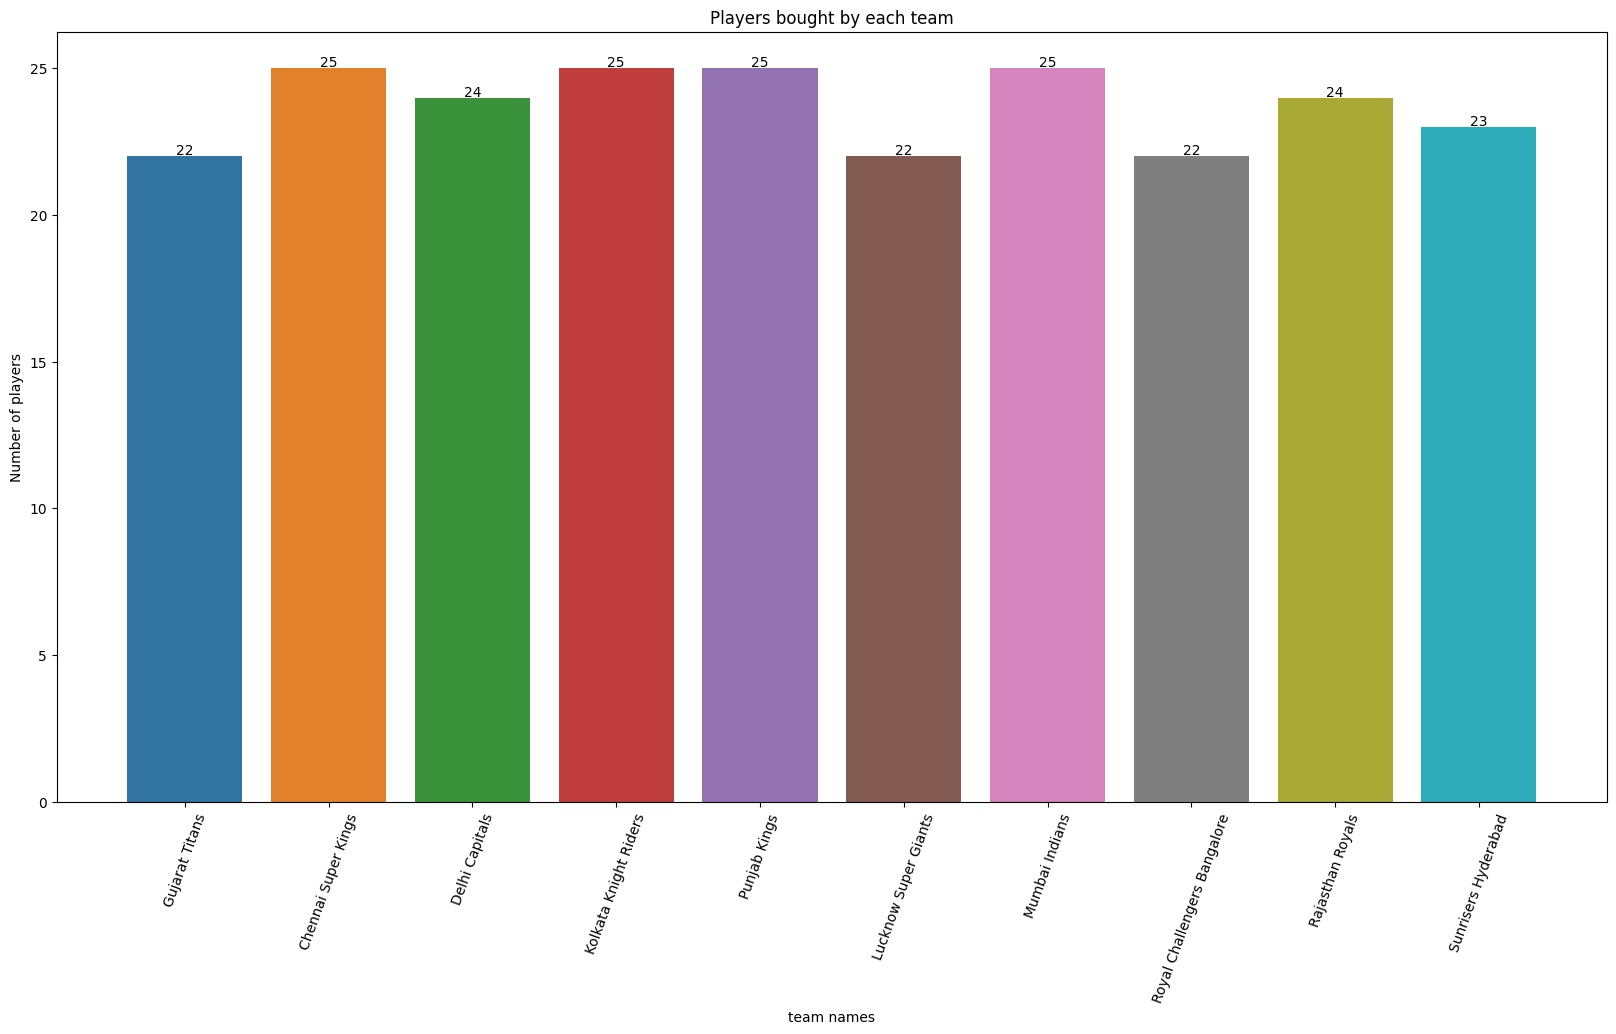

In [21]:
# total number of players bought by each teamx

plt.figure(figsize=(20,10))
fig= sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'])
plt.xlabel('team names')
plt.ylabel('Number of players')
plt.title('Players bought by each team', fontsize=12)
plt.xticks(rotation=70)
plt.plot()

for p in fig.patches:
  fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + 
  p.get_width()/2., p.get_height()), ha='center', va='center',
  xytext=(0,4), textcoords='offset points')


In [22]:
# we are splitting column into 2 columns
ipl['retention'] = ipl['Base Price']

In [23]:
ipl['retention'].replace(['2 Cr', '40 lakh','20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 lakh', '1.5 Cr'],'From Auction', inplace = True )


In [24]:
# Treating Base Price
ipl['Base Price'].replace('Draft Pick', 0, inplace = True)

In [25]:
ipl['base_price_unit'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[-1])
ipl['base_price'] = ipl['Base Price'].apply(lambda x: str(x).split(' ')[0])


In [26]:
ipl['base_price'].replace('Retained', 0, inplace= True)

In [27]:
ipl.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,40 Lakh,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [28]:
# Total players retained and bought 
ipl.groupby(['Team', 'retention'])['retention'].count()[:-1]

Team                         retention   
Chennai Super Kings          30 Lakh          1
                             From Auction    20
                             Retained         4
Delhi Capitals               40 Lakh          1
                             From Auction    19
                             Retained         4
Gujarat Titans               30 Lakh          1
                             40 Lakh          1
                             Draft Pick       3
                             From Auction    17
Kolkata Knight Riders        30 Lakh          1
                             40 Lakh          1
                             From Auction    19
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               30 Lakh          1
                             40 Lakh          1
                             From Auction    19
                             Retained         

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Gujarat Titans'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Punjab Kings'),
  Text(5, 0, 'Lucknow Super Giants'),
  Text(6, 0, 'Mumbai Indians'),
  Text(7, 0, 'Royal Challengers Bangalore'),
  Text(8, 0, 'Rajasthan Royals'),
  Text(9, 0, 'Sunrisers Hyderabad')])

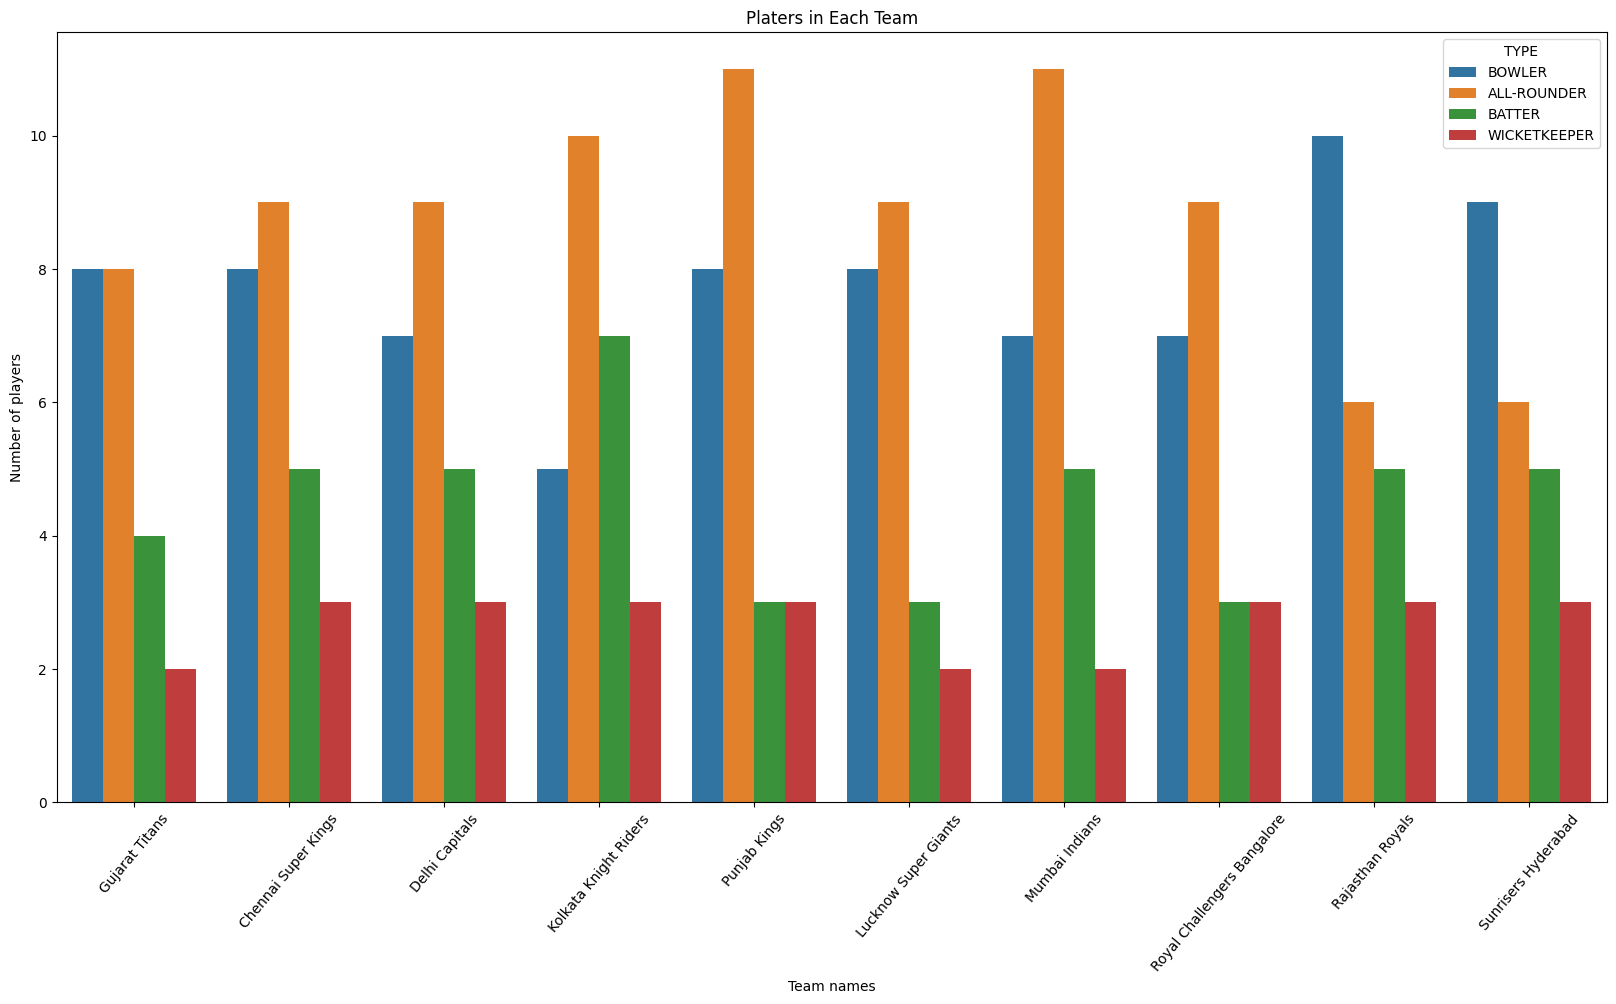

In [29]:
# types of players in each team
plt.figure(figsize=(20,10))
fig = sns.countplot(x=ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.title('Platers in Each Team')
plt.xlabel('Team names')
plt.ylabel('Number of players')
plt.xticks(rotation=50)

In [30]:
# highest amount spent on a single player by each team
ipl[ipl['retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [31]:
# player retained at max price
ipl[ipl['retention']=='Retained'].sort_values(by='COST IN ₹ (CR.)', ascending=False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,0


In [36]:
# top 5 bowlers
ipl[(ipl['retention']=='From Auction') & (ipl['TYPE']=='BOWLER')].sort_values(by='COST IN ₹ (CR.)', ascending = False)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev_team,Team,status,retention,base_price_unit,base_price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction,Cr,2
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction,Lakh,20
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction,Cr,1
...,...,...,...,...,...,...,...,...,...,...,...
345,Marchant De Lange,2 Cr,BOWLER,0.00,0.0,Not participated,Unsold,Unsold,From Auction,Cr,2
344,Taskin Ahmed,50 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,50
326,Midhun Sudhesan,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20
324,Pardeep Sahu,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold,From Auction,Lakh,20


In [52]:
# we are renaming a column
ipl = ipl.rename(columns={'Prev_team':'pt'})

In [54]:
# we are list the players who are unsold
unsold_players= ipl[(ipl.pt != 'Not Participated') & (ipl.Team == 'Unsold')][['Player','pt']]

In [55]:
print(unsold_players)

                     Player                pt
237            Suresh Raina               CSK
238             Steve Smith                DC
239         Shakib Al Hasan               KKR
240             Amit Mishra                DC
241             Adil Rashid              PBKS
..                      ...               ...
628            Sairaj Patil  Not participated
629              Monu Singh  Not participated
630  Nivethan Radhakrishnan  Not participated
631            Lance Morris  Not participated
632            Aaron Hardie  Not participated

[396 rows x 2 columns]
